Heart Disease Prediction Machine Learning Project with the implentation of the Support Vector Machine learning model.

Importing all the neccessary libraries and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import *
from numpy import *
from matplotlib.pyplot import *

Reading the data and creating the dataframe

In [3]:
data=read_csv("Heart_Disease_Prediction.csv")
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


Checking the statistics of the dataset

In [4]:
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


Checking if there is any missing value/ blank data in the dataset.. In case of null values we have to clean and filter the data

In [5]:
data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

Checking the distribution of the target variable

In [6]:
data["Heart Disease"].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

Plotting the Age vs Blood Pressure Graph

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


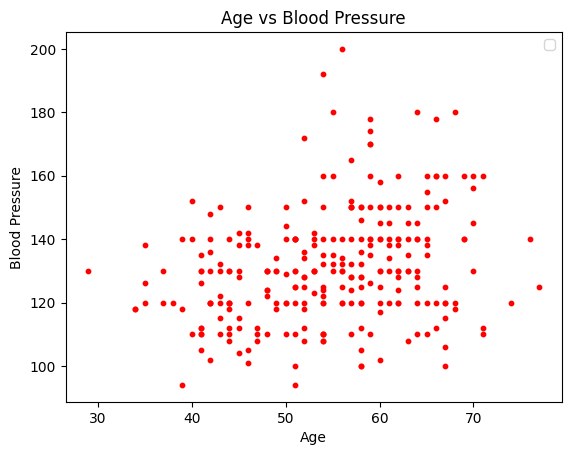

In [21]:
plt.figure()
plt.scatter(data["Age"],data["BP"],c="red",s=10)
plt.title("Age vs Blood Pressure")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.legend()

Separating the independent and the dependent variable ie spliting the dataframe into target dataframe and features dataframe

In [8]:
X=data.drop("Heart Disease",axis=1) #this will have the independent features variable
X

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [9]:
y=data["Heart Disease"] #this will have the dependent target variable
y

0      Presence
1       Absence
2      Presence
3       Absence
4       Absence
         ...   
265     Absence
266     Absence
267     Absence
268     Absence
269    Presence
Name: Heart Disease, Length: 270, dtype: object

Importing the train_test_split module from the model selection package of the sklearn library

In [22]:
from sklearn.model_selection import train_test_split

Spliting the data into training data and the testing data using the train test split module

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

Checking the Split data

In [25]:
print("The X training data \n",X_train)
print("The X testing data \n",X_test)

The X training data 
      Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
264   48    1                2  110          229             0            0   
125   54    0                3  160          201             0            0   
40    40    1                4  152          223             0            0   
154   51    0                3  130          256             0            2   
30    57    1                3  128          229             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
130   63    0                4  108          269             0            0   
95    47    1                4  110          275             0            2   
253   51    1                3  110          175             0            0   
60    57    1                3  150          126             1            0   
155   46    0                2  105          204             0            0   

     Max HR  Exercise angina 

In [26]:
print("The Y training data \n",y_train)
print("The Y testing data \n",y_test)

The Y training data 
 264    Presence
125     Absence
40     Presence
154     Absence
30     Presence
         ...   
130    Presence
95     Presence
253     Absence
60      Absence
155     Absence
Name: Heart Disease, Length: 216, dtype: object
The Y testing data 
 102     Absence
115     Absence
233    Presence
235    Presence
141     Absence
127     Absence
200     Absence
51      Absence
47     Presence
118     Absence
169    Presence
52      Absence
114     Absence
136     Absence
215     Absence
227    Presence
134     Absence
71      Absence
76      Absence
245    Presence
231    Presence
252    Presence
57      Absence
191    Presence
26      Absence
251     Absence
39      Absence
24      Absence
201    Presence
128     Absence
260     Absence
268     Absence
214     Absence
226    Presence
11      Absence
135     Absence
144    Presence
220    Presence
43      Absence
256     Absence
218     Absence
133    Presence
180     Absence
239     Absence
240    Presence
185     Absen

Importing the learning model.
I this case we are importing the Support Vector Classifier(SVC) module from the Support Vector Machine(SVM) package of the Sklearn Library.

In [30]:
from sklearn.svm import SVC

Fit the training data into the model

In [35]:
classifier = SVC(kernel="rbf")
classifier.fit(X_train,y_train)

SVC()

Now make predictions on the testing set

In [37]:
y_pred=classifier.predict(X_test)
print(y_pred)

['Absence' 'Absence' 'Absence' 'Absence' 'Absence' 'Absence' 'Absence'
 'Absence' 'Absence' 'Presence' 'Absence' 'Presence' 'Absence' 'Absence'
 'Absence' 'Presence' 'Absence' 'Presence' 'Absence' 'Absence' 'Absence'
 'Absence' 'Presence' 'Absence' 'Absence' 'Absence' 'Absence' 'Absence'
 'Absence' 'Absence' 'Absence' 'Absence' 'Absence' 'Presence' 'Presence'
 'Absence' 'Absence' 'Presence' 'Absence' 'Presence' 'Absence' 'Presence'
 'Absence' 'Absence' 'Presence' 'Absence' 'Presence' 'Presence' 'Absence'
 'Presence' 'Presence' 'Absence' 'Absence' 'Absence']


Making a dataframe to compare the actual data and the predicted data

In [38]:
df= DataFrame({"Actual":y_test,"Prediction":y_pred})
df.head(10)

,Actual,Prediction
102,Absence,Absence
115,Absence,Absence
233,Presence,Absence
235,Presence,Absence
141,Absence,Absence
127,Absence,Absence
200,Absence,Absence
51,Absence,Absence
47,Presence,Absence
118,Absence,Presence


Importing the accuracy score and the confusion matrix modules from the metrics package of sklearn library inorder to evalute the performance of the model.

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy : ",accuracy)

Accuracy :  0.6851851851851852


In [43]:
cnfmatrix=confusion_matrix(y_test,y_pred)
print("The confusion matrix :\n",cnfmatrix)

The confusion matrix :
 [[29  7]
 [10  8]]


In [44]:
report=classification_report(y_test,y_pred)
print("The classification report is :\n",report)

The classification report is :
               precision    recall  f1-score   support

     Absence       0.74      0.81      0.77        36
    Presence       0.53      0.44      0.48        18

    accuracy                           0.69        54
   macro avg       0.64      0.62      0.63        54
weighted avg       0.67      0.69      0.68        54



This model has been made by Aditya Kundu, Arnab Bera, Arnab Manna, Debojjo Talukdar, Biraj Naskar